In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


## Prepare Dataset

In [3]:
# train_dataset_path = './dataset/train_preprocess.tsv'
# valid_dataset_path = './dataset/valid_preprocess.tsv'

train_dataset_path = './dataset/dataset-training-preprocessed/Text_PreprocessingV2_Train.csv'
valid_dataset_path = './dataset/dataset-training-preprocessed/Text_PreprocessingV2_Valid.csv'

In [4]:
# train_df = pd.read_csv(train_dataset_path, sep='\t', header=None)
# valid_df = pd.read_csv(valid_dataset_path, sep='\t', header=None)

train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[2,7], skiprows=1)
valid_df = pd.read_csv(valid_dataset_path, sep=',', header=None, usecols=[2,7], skiprows=1)

train_df.columns = ['label', 'tweet_tokens_stemmed']
valid_df.columns = ['label', 'tweet_tokens_stemmed']


In [5]:
train_df.head(10)

,label,tweet_tokens_stemmed
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'..."
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart..."
5,2,"['makan', 'agam', 'harga', 'makan', 'food', 's..."
6,1,"['pakai', 'kartu', 'kredit', 'baca', 'untung',..."
7,2,"['unik', 'bagus', 'foto', 'makan', 'enak', 'pe..."
8,2,"['keluarga', 'nikmat', 'alam', 'kuliner', 'sen..."
9,2,['syukur']


In [6]:
jumlah_positives = (train_df['label'] == 2).sum()
print(f'Jumlah review positif: {jumlah_positives}')

jumlah_negatives = (train_df['label'] == 1).sum()
print(f'Jumlah review negatif: {jumlah_negatives}')

Jumlah review positif: 6417
Jumlah review negatif: 3436


In [7]:
# train_df
train_df

,label,tweet_tokens_stemmed
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'..."
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart..."
...,...,...
10996,2,"['enak', 'masakan', 'kepiting', 'senang', 'pil..."
10997,0,"['hormat', 'partaipartai', 'koalisi']"
10998,1,"['pagi', 'pagi', 'tol', 'pasteur', 'macet', 'p..."
10999,2,"['belanja', 'yogya', 'riau', 'junction', 'kali..."


In [9]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
train_df["tweet_join"] = train_df["tweet_tokens_stemmed"].apply(join_text_list)
valid_df["tweet_join"] = valid_df["tweet_tokens_stemmed"].apply(join_text_list)

train_df["tweet_join"].head()

0    warung milik usaha pabrik puluh kenal putih ba...
1    mohon ulama lurus mmbri hujjah partai diwlh su...
2    lokasi strategis jalan sumatera bandung nyaman...
3    betapa bahagia unboxing paket barang bagus tet...
4    duh mahasiswa sombong kasih kartu kuning ajar ...
Name: tweet_join, dtype: object

In [10]:
train_df

,label,tweet_tokens_stemmed,tweet_join
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'...",warung milik usaha pabrik puluh kenal putih ba...
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',...",mohon ulama lurus mmbri hujjah partai diwlh su...
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '...",lokasi strategis jalan sumatera bandung nyaman...
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba...",betapa bahagia unboxing paket barang bagus tet...
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart...",duh mahasiswa sombong kasih kartu kuning ajar ...
...,...,...,...
10996,2,"['enak', 'masakan', 'kepiting', 'senang', 'pil...",enak masakan kepiting senang pilih kepiting se...
10997,0,"['hormat', 'partaipartai', 'koalisi']",hormat partaipartai koalisi
10998,1,"['pagi', 'pagi', 'tol', 'pasteur', 'macet', 'p...",pagi pagi tol pasteur macet parah jengkel
10999,2,"['belanja', 'yogya', 'riau', 'junction', 'kali...",belanja yogya riau junction kali lihat foodlif...


In [11]:
# Filter DataFrame untuk label 1 dan 2
df_train_filtered = train_df[train_df['label'].isin([1, 2])]
df_valid_filtered = valid_df[valid_df['label'].isin([1, 2])]

# Perbarui label sehingga label 1 menjadi 0 dan label 2 menjadi 1
df_train_filtered.loc[:, 'label'] = df_train_filtered['label'].map({1: 0, 2: 1})
df_valid_filtered.loc[:, 'label'] = df_valid_filtered['label'].map({1: 0, 2: 1})


# Split dataset menjadi fitur (X) dan label (y)
X_train = df_train_filtered['tweet_join']
y_train = df_train_filtered['label']

X_valid = df_valid_filtered['tweet_join']
y_valid = df_valid_filtered['label']

## Split Dataset

In [12]:
# Filter DataFrame untuk label 1 dan 2
df_filtered = train_df[train_df['label'].isin([1, 2])]

# Perbarui label sehingga label 1 menjadi 0 dan label 2 menjadi 1
df_filtered.loc[:, 'label'] = df_filtered['label'].map({1: 0, 2: 1})




In [13]:
# Filter DataFrame untuk label 1 dan 2
df_train_filtered = train_df[train_df['label'].isin([1, 2])]
df_valid_filtered = valid_df[valid_df['label'].isin([1, 2])]

# Perbarui label sehingga label 1 menjadi 0 dan label 2 menjadi 1
df_train_filtered.loc[:, 'label'] = df_train_filtered['label'].map({1: 0, 2: 1})
df_valid_filtered.loc[:, 'label'] = df_valid_filtered['label'].map({1: 0, 2: 1})

In [14]:
## hitung jumlah positive dan negative
jumlah_positives = (df_train_filtered['label'] == 1).sum()
print(f'Jumlah review positif: {jumlah_positives}')

jumlah_negatives = (df_train_filtered['label'] == 0).sum()
print(f'Jumlah review negatif: {jumlah_negatives}')

jumlah_positives = (df_valid_filtered['label'] == 1).sum()
print(f'Jumlah review positif: {jumlah_positives}')

jumlah_negatives = (df_valid_filtered['label'] == 0).sum()
print(f'Jumlah review negatif: {jumlah_negatives}')


Jumlah review positif: 6417
Jumlah review negatif: 3436
Jumlah review positif: 735
Jumlah review negatif: 394


## Generate Padded Sequence

In [15]:
# Parameters

vocab_size = 20000
max_length = 100
embedding_dim = 8
trunc_type='post'
oov_tok = "<OOV>"

In [16]:
## Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate word index dictionary for the training sentences
tokenizer.fit_on_texts(df_train_filtered['tweet_join'])
word_index = tokenizer.word_index
print(word_index)

# Convert the training sentences into word sequences
train_sequences = tokenizer.texts_to_sequences(df_train_filtered['tweet_join'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert the validation sentences into word sequences
valid_sequences = tokenizer.texts_to_sequences(df_valid_filtered['tweet_join'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)

{'<OOV>': 1, 'makan': 2, 'enak': 3, 'harga': 4, 'bandung': 5, 'menu': 6, 'banget': 7, 'restoran': 8, 'layan': 9, 'pilih': 10, 'coba': 11, 'suasana': 12, 'nyaman': 13, 'malam': 14, 'jalan': 15, 'suka': 16, 'goreng': 17, 'ayam': 18, 'pandang': 19, 'bagus': 20, 'nasi': 21, 'mahal': 22, 'orang': 23, 'keluarga': 24, 'lumayan': 25, 'saji': 26, 'minum': 27, 'pesan': 28, 'lokasi': 29, 'cocok': 30, 'nikmat': 31, 'pas': 32, 'kota': 33, 'resto': 34, 'porsi': 35, 'salah': 36, 'steak': 37, 'sedia': 38, 'kali': 39, 'rumah': 40, 'sunda': 41, 'deh': 42, 'khas': 43, 'rekomendasi': 44, 'murah': 45, 'kafe': 46, 'jangkau': 47, 'masakan': 48, 'teman': 49, 'oke': 50, 'mi': 51, 'indonesia': 52, 'ramai': 53, 'bakar': 54, 'favorit': 55, 'bakso': 56, 'ramah': 57, 'pakai': 58, 'mantap': 59, 'letak': 60, 'tambah': 61, 'jam': 62, 'sambal': 63, 'daging': 64, 'siang': 65, 'unjung': 66, 'kecewa': 67, 'cepat': 68, 'luas': 69, 'parkir': 70, 'kunjung': 71, 'masuk': 72, 'pedas': 73, 'segar': 74, 'cari': 75, 'mes': 76, 'a

In [18]:
import pickle

# Simpan tokenizer ke dalam file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [31]:
index_word = {idx: word for word, idx in word_index.items()}


sample_sequence = train_sequences[5000]
original_words = [index_word.get(token, '') for token in sample_sequence]
original_sentence = ' '.join(original_words)

print(original_sentence)
train_padded[5000]

kepala kakap mantap banget empuk padu bumbu yv resap pas layan serba cepat ramah khas rumah makan padang lokasi strategis parkir pada


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  804, 2177,   59,    7,  202,  420,   99, 8840,  619,   32,
          9, 1033,   68,   57,   43,   40,    2,  294,   29,  137,   70,
       1467])

## Ubah kata menjadi vektor

In [32]:
from gensim.models import Word2Vec
# Tujuan dari arsitektur skip-gram adalah untuk memprediksi konteks (output) di sekitar current word (input).

# vector_size: Dimensi dari vektor embedding yang akan direpresentasikan untuk setiap kata. 
#              Misalnya, vector_size=8 akan menghasilkan vektor 8 dimensi untuk setiap kata.

# window: Jumlah maksimum kata yang digunakan sebagai konteks saat melatih model Word2Vec. 
#         Misalnya, window=5 berarti bahwa Word2Vec akan mempertimbangkan 5 kata sebelum dan 5 kata setelah kata target.

# min_count: Jumlah minimum kemunculan kata dalam korpus teks yang diperlukan agar kata tersebut 
#            dimasukkan dalam kosakata (vocabulary) dan dipertimbangkan saat melatih model. 
#            Kata-kata yang memiliki frekuensi kemunculan kurang dari nilai ini akan diabaikan.

# workers: Jumlah thread yang digunakan saat melatih model. Ini mempercepat proses pelatihan 
#          dengan memungkinkan beberapa iterasi dilakukan secara paralel.

sentences = [sentence.split() for sentence in df_train_filtered['tweet_join']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=5, workers=4)

## Vectorize the data

In [33]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [35]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[1100])
print(word)

('iblis', array([ 0.20842966,  0.18855664,  0.3625069 ,  0.12605008,  0.66262513,
       -0.74950862,  1.26227319,  0.04458093]))


In [36]:
# Ambil kalimat dari baris 11001 dalam dataset pelatihan
kalimat = df_train_filtered["tweet_join"].iloc[110]

# Tokenisasi kalimat menjadi kata-kata individual
kata_kata = kalimat.split()

# Inisialisasi list untuk menyimpan nilai word embedding
nilai_embedding = []

# Iterasi melalui setiap kata dalam kalimat
for kata in kata_kata:
    # Dapatkan indeks kata dari kamus kata (word_index)
    indeks_kata = word_index.get(kata)
    # Jika kata ada dalam kamus kata, ambil nilai word embedding-nya
    if indeks_kata is not None:
        nilai_embedding.append(embedding_matrix[indeks_kata])
    else:
        # Jika kata tidak ada dalam kamus kata, nilai embedding-nya dianggap nol atau sesuai dengan token OOV
        nilai_embedding.append(np.zeros(embedding_matrix.shape[1]))  # Jika token OOV

# Konversi list nilai embedding menjadi numpy array
nilai_embedding = np.array(nilai_embedding)

# Tampilkan nilai word embedding untuk setiap kata dalam kalimat
for i, kata in enumerate(kata_kata):
    print(f"Nilai word embedding untuk kata '{kata}':")
    print(nilai_embedding[i])


Nilai word embedding untuk kata 'bosan':
[ 0.28202215  0.35535669  0.40166962  0.77304339  1.16780055 -0.81101251
  2.236413    0.03316752]
Nilai word embedding untuk kata 'janjijanji':
[-0.07281075  0.06621758  0.17289437 -0.08818111  0.08706944 -0.07863134
  0.25389898  0.03981145]


In [37]:
embedding_matrix.shape

(20000, 8)

## Build and Compile Model

In [38]:



model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8,  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 8)            │    160,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 128)           │      5,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d            │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 16)                │      2,064 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │         17 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 167,329 (653.63 KB)

 Trainable params: 167,329 (653.63 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [39]:
num_epochs = 5

history = model.fit(train_padded, df_train_filtered["label"], epochs=num_epochs, validation_data=(valid_padded, df_valid_filtered["label"]), verbose=2)


Epoch 1/5
308/308 - 4s - 13ms/step - accuracy: 0.7997 - loss: 0.4473 - val_accuracy: 0.8565 - val_loss: 0.3598
Epoch 2/5
308/308 - 2s - 6ms/step - accuracy: 0.8360 - loss: 0.4005 - val_accuracy: 0.8627 - val_loss: 0.3339
Epoch 3/5
308/308 - 2s - 6ms/step - accuracy: 0.8549 - loss: 0.3637 - val_accuracy: 0.8583 - val_loss: 0.3309
Epoch 4/5
308/308 - 2s - 6ms/step - accuracy: 0.8743 - loss: 0.3187 - val_accuracy: 0.8716 - val_loss: 0.3045
Epoch 5/5
308/308 - 2s - 6ms/step - accuracy: 0.8916 - loss: 0.2820 - val_accuracy: 0.8822 - val_loss: 0.2873


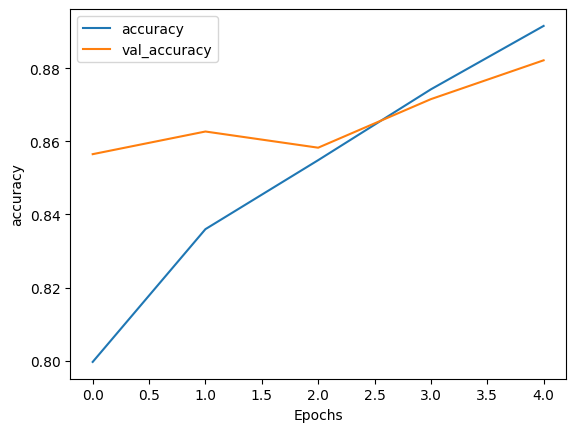

In [40]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

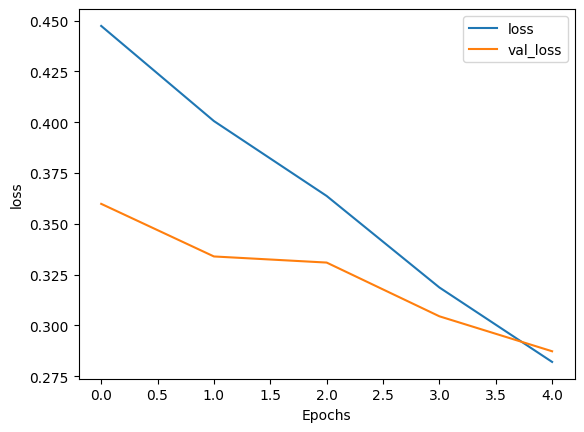

In [41]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [42]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = (y_pred >= 0.5).astype(int)

# Mencetak classification report
print(classification_report(df_valid_filtered["label"], y_pred_classes))


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       394
           1       0.89      0.93      0.91       735

    accuracy                           0.88      1129
   macro avg       0.88      0.86      0.87      1129
weighted avg       0.88      0.88      0.88      1129



In [43]:
def predict_sentiment(model, tokenizer, text):
    # Tokenisasi teks
    sample_seq = tokenizer.texts_to_sequences([text])
    sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
    
    # Prediksi sentimen menggunakan model
    prediction = model.predict(sample_padded)
    print(prediction)
    # Mengembalikan label sentimen berdasarkan output model
    if prediction >= 0.5:
        return "Positif"
    else:
        return "Negatif"

# Menggunakan fungsi untuk memprediksi sentimen dari contoh kalimat
sample_text = "timnas indonesia main mantep keren banget serang bagus tahan bagus "
predicted_label = predict_sentiment(model, tokenizer, sample_text)
print("Label Sentimen:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.84414995]]
Label Sentimen: Positif


In [68]:
y_pred_classes

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [78]:
#save model
model.save('./model/model-cnn-word2vec-2-classes-stemmed.h5')